In [7]:
import pandas as pd

# Data Load

In [12]:
# Load Mystery Allocation 1 (MA1) and set date as index
df_myst1 = pd.read_csv('Mystery Allocation 1.csv', header = None, names = ['Date', 'MA1']).set_index('Date')

# Load Mystery Allocation 2 (MA2) and set date as index
df_myst2 = pd.read_csv('Mystery Allocation 2.csv', header = None, names = ['Date', 'MA2']).set_index('Date')

# Join Mystery Allocations into one df on date
df_myst = df_myst1.join(df_myst2, how = 'inner')

# Set index type as DateTime 
df_myst.index.name = None
df_myst.index = pd.to_datetime(df_myst.index, format="%d/%m/%Y")

df_myst.tail()

,MA1,MA2
2024-05-14,190.480695,157.451811
2024-05-15,192.174244,159.031775
2024-05-16,192.412787,158.958119
2024-05-17,192.465288,158.583678
2024-05-20,192.964456,158.735422


In [ ]:
# Load Anonymized ETFs data, drop empty 1st row and set date index
df_anon = pd.read_csv('Anonymized ETFs.csv').drop(index = 0).set_index('Unnamed: 0')
df_anon.index.name = None
df_anon.index = pd.to_datetime(df_anon.index, format="%d/%m/%Y")
df_anon.tail()

,ETF 1,ETF 2,ETF 3,ETF 4,ETF 5,ETF 6,ETF 7,ETF 8,ETF 9,ETF 10,...,ETF 96,ETF 97,ETF 98,ETF 99,ETF 100,ETF 101,ETF 102,ETF 103,ETF 104,ETF 105
2024-05-14,222.959814,199.228723,131.703758,188.659282,153.497922,227.120201,101.071064,184.116497,235.451454,110.345434,...,135.307870,210.237381,141.592222,176.085016,168.022129,233.451994,133.694494,98.061767,180.915307,208.038408
2024-05-15,225.601187,201.404310,132.214373,190.530904,153.819681,229.083106,101.544663,184.323690,237.549664,111.196453,...,134.463329,210.698033,142.572063,176.302425,169.664571,234.375517,134.222484,98.797196,181.942502,210.862022
2024-05-16,225.163960,201.256958,133.919891,190.706720,154.066514,228.684734,101.495076,185.879593,236.794736,111.434769,...,134.768047,211.605053,143.040059,176.364073,170.340427,234.803547,136.260230,98.994227,181.376845,210.733330
2024-05-17,225.433006,201.492389,134.190049,190.945254,153.730780,229.201730,101.206085,187.849883,236.946766,111.161862,...,136.063098,212.184295,143.163635,177.637098,171.777897,235.309356,136.433126,98.746793,181.128205,210.620803
2024-05-20,225.652970,201.784304,134.496259,191.238399,153.802675,228.797287,101.158138,189.233776,237.418256,111.139311,...,136.443995,213.900653,143.006972,177.637098,171.777897,234.020517,136.735643,98.728464,181.600622,211.266719


In [ ]:
# Load main data, drop empty 1st row and set date index
df_main = pd.read_csv('Main Asset Classes.csv', header = 4).drop(index = 0).set_index('Unnamed: 0')
df_main.index.name = None
df_main.index = pd.to_datetime(df_main.index, format="%d/%m/%Y")
df_main.tail()

,S&P 500,Nasdaq 100,US Small Caps,Euro Stoxx 50,UK FTSE,MSCI EM,Japan,US IG,US HY,EU IG,EU HY,EM Bond,Gold,Commodity
2024-05-16,10000.95,22304.45,11235.5646,11974.50,9183.73,577.319,68787.24,310.1339,340.2460,225.1678,219.7736,583.088,554.8315,243.8854
2024-05-17,10012.90,22290.58,11234.1090,11955.18,9163.72,578.232,68552.39,309.4673,340.0258,224.5541,219.7951,581.660,562.3082,247.7532
2024-05-20,10022.67,22444.71,11271.2294,11990.83,9168.01,579.355,69051.32,308.9475,340.3139,224.4017,219.9174,581.542,567.4638,251.3686
2024-05-21,10047.92,22492.71,11249.8280,11938.72,9159.58,574.910,68834.37,309.7537,340.6143,224.7054,220.0009,581.974,564.6425,250.8065
2024-05-22,10047.92,22492.71,11249.8280,11895.51,9128.59,574.910,68251.52,309.7537,340.6143,224.7054,220.0009,581.974,563.5957,249.9283


In [20]:
# Check for missing values
df_main.isna().sum()

S&P 500          0
Nasdaq 100       0
US Small Caps    0
Euro Stoxx 50    0
UK FTSE          0
MSCI EM          0
Japan            0
US IG            0
US HY            0
EU IG            0
EU HY            0
EM Bond          0
Gold             0
Commodity        0
dtype: int64

# ZAD 1. (LUKAS)

Pracujemy z Data Frame "df_anon". Kazda kolumna to cena ETFa w czasie. Przykład dla 'ETF 1':

<Axes: title={'center': 'ETF 1 Price Chart'}>

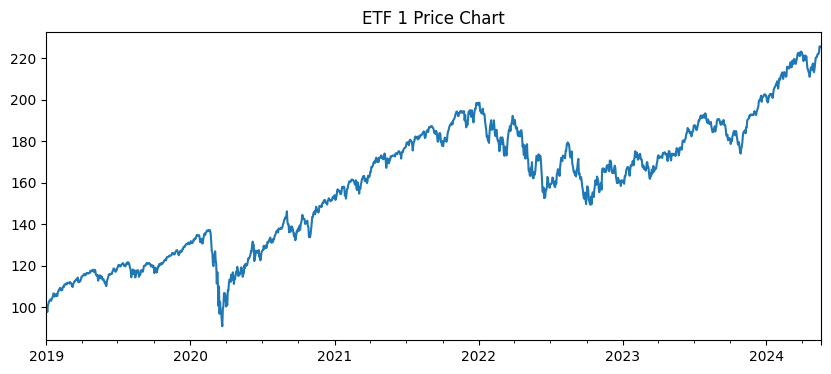

In [26]:
df_anon['ETF 1 '].plot(title='ETF 1 Price Chart', figsize=(10,4))

Policz:
- returns (dzienna procentowa zmiana ceny)
- log returns (jak wyzej tylko wg innego wzoru z logarytmem)
- cummulative returns
- cummulative log returns
- mean daily returns
- annualised returns
- volatility (odchylenie standardowe returns)
- annualised volatility
- Sharpe ratio

Kazda miara musi byc osobnym obiektem / zmienną (Pandas Data Framem albo wektorem / Pandas Series).

np. **df_returns** będzie Data Framem, w którym kazda kolumna będzie zawierac zmianę procentową ceny kazdego ETFa w kazdym dniu.

**!! WSZYSTKO MA BYC ŁADNIE NAPISANE W CLEAN FORMACIE df_zmienna !!**

Przykład returns dla ETF 1:

<Axes: title={'center': 'Daily Price % Change'}>

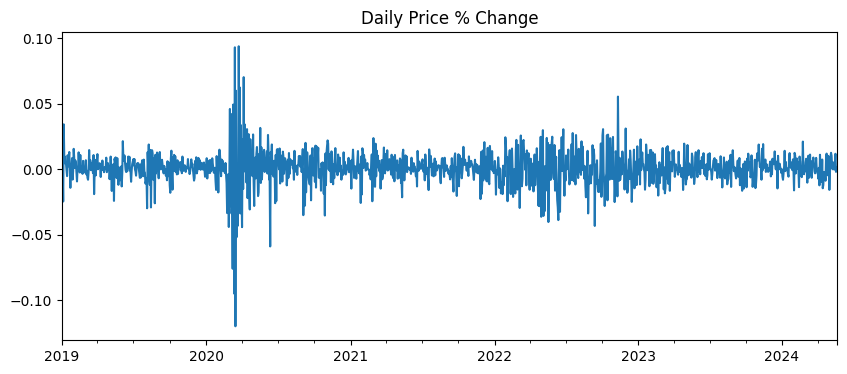

In [38]:
df_anon['ETF 1 '].pct_change().plot(title='Daily Price % Change', figsize=(10,4))